# LHC Filling Scheme from LPC data

Info on the filling scheme for a fill
- get filling scheme from LPC web page
- decode filling scheme with various functions
- do some plots

In [1]:
import LHCTools as ltools
from LHCTools import LPC_FillingScheme

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# %matplotlib notebook
%matplotlib inline

In [15]:
fno = 7334

## LHC Filling Scheme info from LPC web

In [16]:
ltools.my_cool_test_method()

LHCTools - It works!


In [17]:
lpcfscheme = LPC_FillingScheme.LPCFillingScheme(fno)

In [18]:
injSchemeDF = lpcfscheme.injectionsDF
injSchemeDF.head()

,inj Nbr,Ring,RF Bucket,Bu Spac (ns),bu per PS batch,SPS Batch spac,PSbatch nbr
idx,,,,,,,
1,1,ring_2,61,25,12,0,1
2,1,ring_1,181,25,12,0,1
3,2,ring_1,611,25,48,1375,2
4,2,ring_2,611,25,48,1375,2
5,3,ring_1,1951,25,48,1375,3


In [19]:
lpcfscheme.fsprint()

>>>>> LPC Filling scheme for fil 7334
name ______________________________ 25ns_2556b_2544_2215_2332_144bpi_20injV3
csv blocs _________________________ 14
injections (both beams) ___________ 40
bunches ___________________________ {'B1': {'probe': 0, 'Nominal': 2556}, 'B2': {'probe': 0, 'Nominal': 2556}}
collisions ________________________ 
  Tot number of B1 injections _____ 20
  Tot number of B2 injections _____ 20
  Collisions at IP1&5______________ 2544
  B1-empty at IP1&5________________ 12
  B2-empty at IP1&5________________ 12
  Empty-empty at IP1&5_____________ 996
  Collisions at IP2________________ 2215
  B1-empty at IP2__________________ 341
  B2-empty at IP2__________________ 341
  Empty-empty at IP2_______________ 667
  Collisions at IP8________________ 2332
  B1-empty at IP8__________________ 224
  B2-empty at IP8__________________ 224
  Empty-empty at IP8_______________ 784
long ranges (2 beams, all IPs) ____ 298488
long ranges (2 beams) _____________ 5112
head on (2 beams

In [20]:
lrcolldf = lpcfscheme.longrangeDF
lrcolldf.head()

,RFbucketbeam1,RFbucketbeam2,z-pos/m,ip
0,231,61,-63.64,IP1
1,241,71,-63.64,IP1
2,251,81,-63.64,IP1
3,261,91,-63.64,IP1
4,271,101,-63.64,IP1


In [21]:
lrcollbeam = lpcfscheme.lrbeamDF
lrcollbeam[lrcollbeam['beam'] == 'B1'].head()

,RFbucket,Slot,Head-On IP1,Head-On IP2,Head-On IP5,Head-On IP8,Head-On Tot,LR IP1,LR IP2,LR IP5,LR IP8,LR Tot,beam
0,181,18,0,1,0,1,2,12,26,12,17,67,B1
1,191,19,0,1,0,1,2,12,27,12,18,69,B1
2,201,20,0,1,0,1,2,12,28,12,19,71,B1
3,211,21,0,1,0,1,2,12,29,12,20,73,B1
4,221,22,0,1,0,1,2,12,30,12,21,75,B1


In [22]:
hobeam = lpcfscheme.hobeamDF
hobeam[hobeam['beam'] == 'B2'].head()

,bucket number,IP1,IP2,IP5,IP8,beam
0,61,-,-,-,9001,B2
1,71,-,-,-,9011,B2
2,81,-,-,-,9021,B2
3,91,-,-,-,9031,B2
4,101,-,-,-,9041,B2


## Do some plots

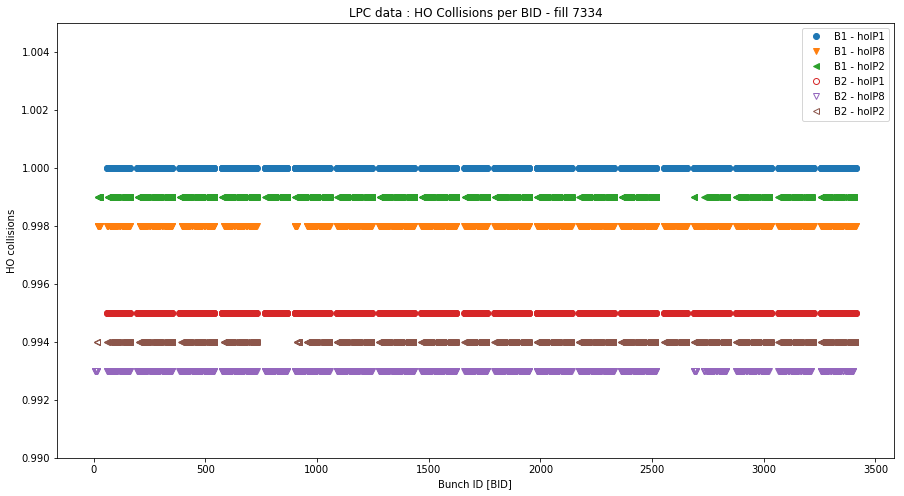

In [23]:
fig, ax = plt.subplots(1,1, figsize=(15,8))

_tmp0 = lpcfscheme.lrbeamDF[['beam','Slot','Head-On IP1','Head-On IP2','Head-On IP8']].copy()

_tmp = _tmp0[_tmp0['beam'] == 'B1'].copy()
_tmp['hoip1s'] = _tmp['Head-On IP1']*1.000
_tmp['hoip2s'] = _tmp['Head-On IP2']*0.999
_tmp['hoip8s'] = _tmp['Head-On IP8']*0.998
_tmp.plot(x='Slot',y='hoip1s', label='B1 - hoIP1', marker='o', style='o', ax=ax)
_tmp.plot(x='Slot',y='hoip8s', label='B1 - hoIP8', marker='v', style='o', ax=ax)
_tmp.plot(x='Slot',y='hoip2s', label='B1 - hoIP2', marker='<', style='o', ax=ax)

_tmp = _tmp0[_tmp0['beam'] == 'B2'].copy()
_tmp['hoip1s'] = _tmp['Head-On IP1']*0.995
_tmp['hoip2s'] = _tmp['Head-On IP2']*0.994
_tmp['hoip8s'] = _tmp['Head-On IP8']*0.993
_tmp.plot(x='Slot',y='hoip1s', label='B2 - hoIP1', marker='o', fillstyle='none', style='o', ax=ax)
_tmp.plot(x='Slot',y='hoip8s', label='B2 - hoIP8', marker='v', fillstyle='none', style='o', ax=ax)
_tmp.plot(x='Slot',y='hoip2s', label='B2 - hoIP2', marker='<', fillstyle='none', style='o', ax=ax)

plt.ylim(0.99,1.005)
plt.xlabel('Bunch ID [BID]')
plt.ylabel('HO collisions')
plt.title('LPC data : HO Collisions per BID - fill {}'.format(fno))
plt.legend()

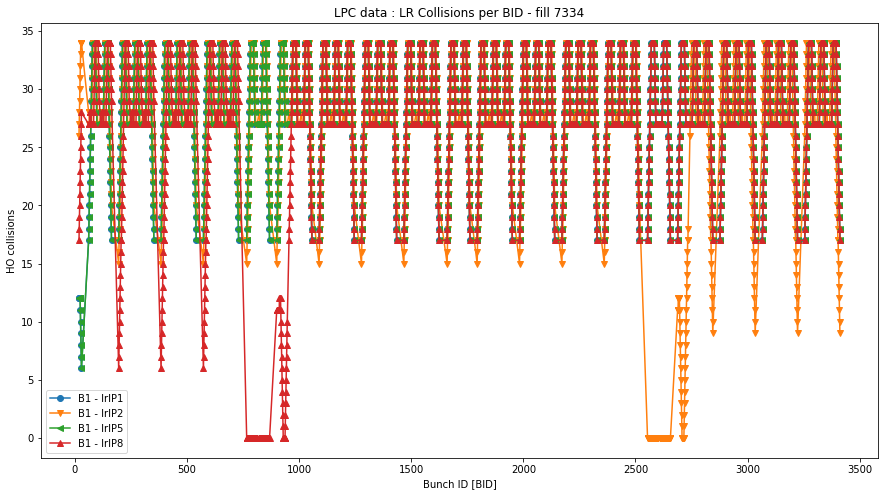

In [24]:
fig, ax = plt.subplots(1,1, figsize=(15,8))
_tmp = lpcfscheme.lrbeamDF[lpcfscheme.lrbeamDF['beam']== 'B1']
_tmp.plot(x='Slot', y='LR IP1', label='B1 - lrIP1', marker='o', style='-', ax=ax)
_tmp.plot(x='Slot', y='LR IP2', label='B1 - lrIP2', marker='v', style='-', ax=ax)
_tmp.plot(x='Slot', y='LR IP5', label='B1 - lrIP5', marker='<', style='-', ax=ax)
_tmp.plot(x='Slot', y='LR IP8', label='B1 - lrIP8', marker='^', style='-', ax=ax)

# plt.ylim(0.99,1.005)
plt.xlabel('Bunch ID [BID]')
plt.ylabel('HO collisions')
plt.title('LPC data : LR Collisions per BID - fill {}'.format(fno))
plt.legend()

In [25]:
_tmp = lpcfscheme.lrbeamDF
_tmp[(_tmp['Head-On IP1'] == 1) & (_tmp['beam'] == 'B1')].shape
rfbuck_coll_ip1 = _tmp[(_tmp['Head-On IP1'] == 1) & (_tmp['beam'] == 'B1')]['RFbucket'].values
rfbuck_coll_ip1

array([  611,   621,   631, ..., 34101, 34111, 34121])

In [26]:
_tmp = lpcfscheme.longrangeDF
lrdf = _tmp[_tmp['RFbucketbeam1'].isin(rfbuck_coll_ip1)]
xx = lrdf.groupby(['ip','z-pos/m']).count()
xx.head()

RFbucketbeam1  RFbucketbeam2
ip  z-pos/m                              
IP1 -63.64            1983           1983
    -59.89            2002           2002
    -56.15            2021           2021
    -52.41            2040           2040
    -48.66            2059           2059

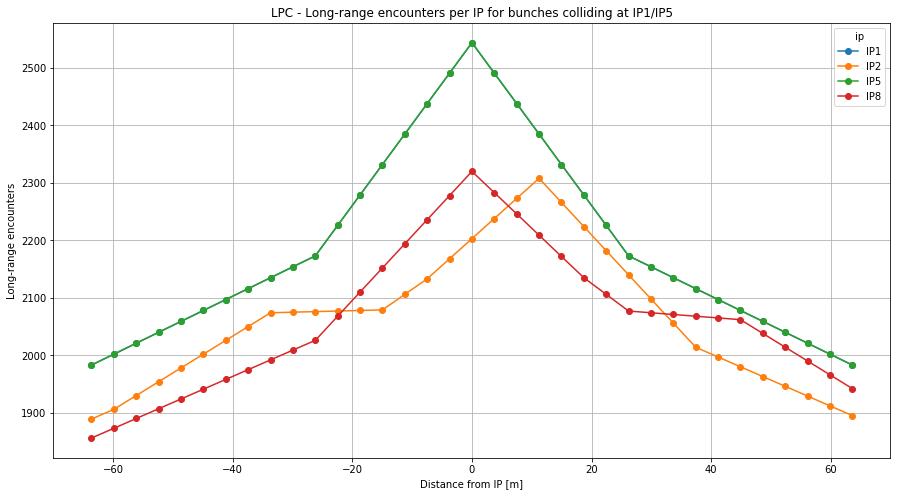

In [27]:
fig, ax = plt.subplots(1,1, figsize=(15,8))
lrdf.groupby(['z-pos/m','ip']).count()['RFbucketbeam1'].unstack().plot(marker='o',ax=ax)
plt.ylabel('Long-range encounters')
plt.xlabel('Distance from IP [m]')
plt.title('LPC - Long-range encounters per IP for bunches colliding at IP1/IP5'.format(fno))
plt.grid()
plt.show()